In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/glaucoma_dataset.csv')

In [8]:
df.head(5)

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,NaN,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma


- 결측치를 확인한다.
- 데이터 타입을 확인한다. 
- 데이터의 크기를 확인한다.
- 컬럼의 크기를 확인한다.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             7453 non-null   object 
 8   Medication Usage                            8769 non-null   object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

In [30]:
# 컬럼별 널값 확인
for col in df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

column: Patient ID	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 0.00%
column:     Gender	 Percent of NaN value: 0.00%
column: Visual Acuity Measurements	 Percent of NaN value: 0.00%
column: Intraocular Pressure (IOP)	 Percent of NaN value: 0.00%
column: Cup-to-Disc Ratio (CDR)	 Percent of NaN value: 0.00%
column: Family History	 Percent of NaN value: 0.00%
column: Medical History	 Percent of NaN value: 25.47%
column: Medication Usage	 Percent of NaN value: 12.31%
column: Visual Field Test Results	 Percent of NaN value: 0.00%
column: Optical Coherence Tomography (OCT) Results	 Percent of NaN value: 0.00%
column: Pachymetry	 Percent of NaN value: 0.00%
column: Cataract Status	 Percent of NaN value: 0.00%
column: Angle Closure Status	 Percent of NaN value: 0.00%
column: Visual Symptoms	 Percent of NaN value: 0.00%
column:  Diagnosis	 Percent of NaN value: 0.00%
column: Glaucoma Type	 Percent of NaN value: 0.00%


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

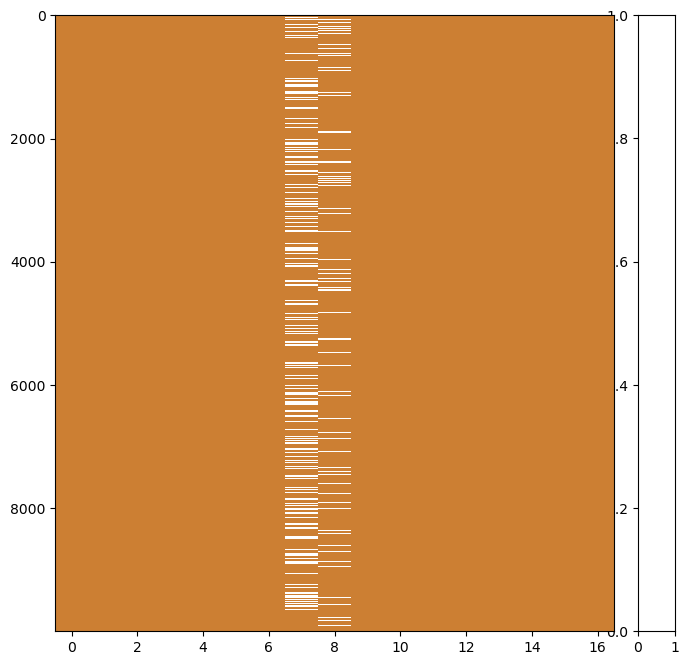

In [37]:
# 결측치의 분포를 확인
msno.matrix(df=df.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [24]:
df.describe()

,Patient ID,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50002.16880,53.872200,17.507527,0.548437,549.733974
std,28939.82498,21.127563,4.356101,0.144326,28.902741
min,4.00000,18.000000,10.000000,0.300000,500.010000
25%,24660.25000,36.000000,13.760000,0.420000,524.590000
50%,50091.50000,54.000000,17.485000,0.550000,549.335000
75%,74829.25000,72.000000,21.300000,0.670000,574.972500
max,99992.00000,90.000000,25.000000,0.800000,599.990000


## Patient ID
- 해당 변수에 대한 결측치 확인을 한다.
- 해당 변수에 대한 중복값을 확인한다
- 변수의 특성을 파악한다.

#### Patient ID 변수는 중복값이 없이 모두 다른 값을 가지고 있으므로 인덱스와 같은 데이터로 생각하면 될 것 같습니다. 

In [19]:
# 결측치 확인
df['Patient ID'].isna().sum()

0

In [21]:
# 중복값 확인
df['Patient ID'].duplicated().sum()

0

## Age
- 해당 변수에 대한 결측치 확인을 한다.
- 변수의 특성을 파악한다.

#### 나이의 분포에 특이점이 있다. 
- 나이별 분포가 균일하다.
- 확진자의 나이 분포와 비확진자의 나이분포가 같다.

#### 결론
- 데이터를 인위적으로 customizing 한듯하다.


In [23]:
# 결측치 확인
df['Age'].isna().sum()

0

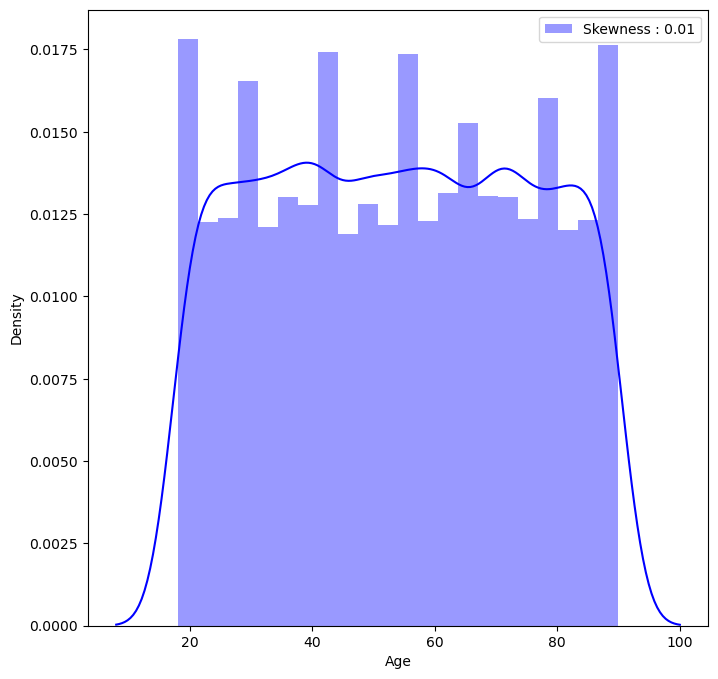

In [41]:
# 중복값 확인
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df['Age'], color='b', label='Skewness : {:.2f}'.format(df['Age'].skew()), ax=ax)
g = g.legend(loc='best')

In [43]:
print('제일 나이 많은 환자 : {:.1f} Years'.format(df['Age'].max()))
print('제일 어린 환자 : {:.1f} Years'.format(df['Age'].min()))
print('환자 평균 나이 : {:.1f} Years'.format(df['Age'].mean()))

제일 나이 많은 환자 : 90.0 Years
제일 어린 환자 : 18.0 Years
환자 평균 나이 : 53.9 Years


In [74]:
print('확진자 중에 제일 나이 많은 환자 : {:.1f} Years'.format(df[df['Diagnosis'] != 'No']['Age'].max()))
print('확진자 중에 제일 어린 환자 : {:.1f} Years'.format(df[df['Diagnosis'] != 'No']['Age'].min()))
print('확진자 중에 환자 평균 나이 : {:.1f} Years'.format(df[df['Diagnosis'] != 'No']['Age'].mean()))

확진자 중에 제일 나이 많은 환자 : 90.0 Years
확진자 중에 제일 어린 환자 : 18.0 Years
확진자 중에 환자 평균 나이 : 53.9 Years


- Age 컬럼의 확진자의 나이 분포와 비확진자의 나이 분포가 같다. 

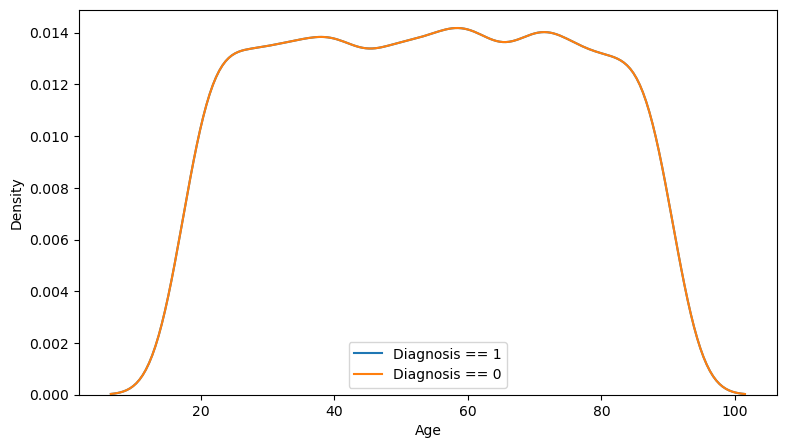

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['Diagnosis'] == 'Glaucoma']['Age'], ax=ax)
sns.kdeplot(df[df['Diagnosis'] == 'Glaucoma']['Age'], ax=ax)
plt.legend(['Diagnosis == 1', 'Diagnosis == 0'])
plt.show()

## Gender
- 해당 변수에 대한 결측치 확인을 한다.
- 변수의 분포를 확인한다.
- 변수의 특성을 파악한다.

#### 특이사항
- 남자 여자의 데이터 비율이 약 50%로 비슷함
- 확진자 별 성별의 비율도 비슷함
- 성별은 특징으로 효력이 없을 수도??


Text(0.5, 1.0, 'Count plot - Gender')

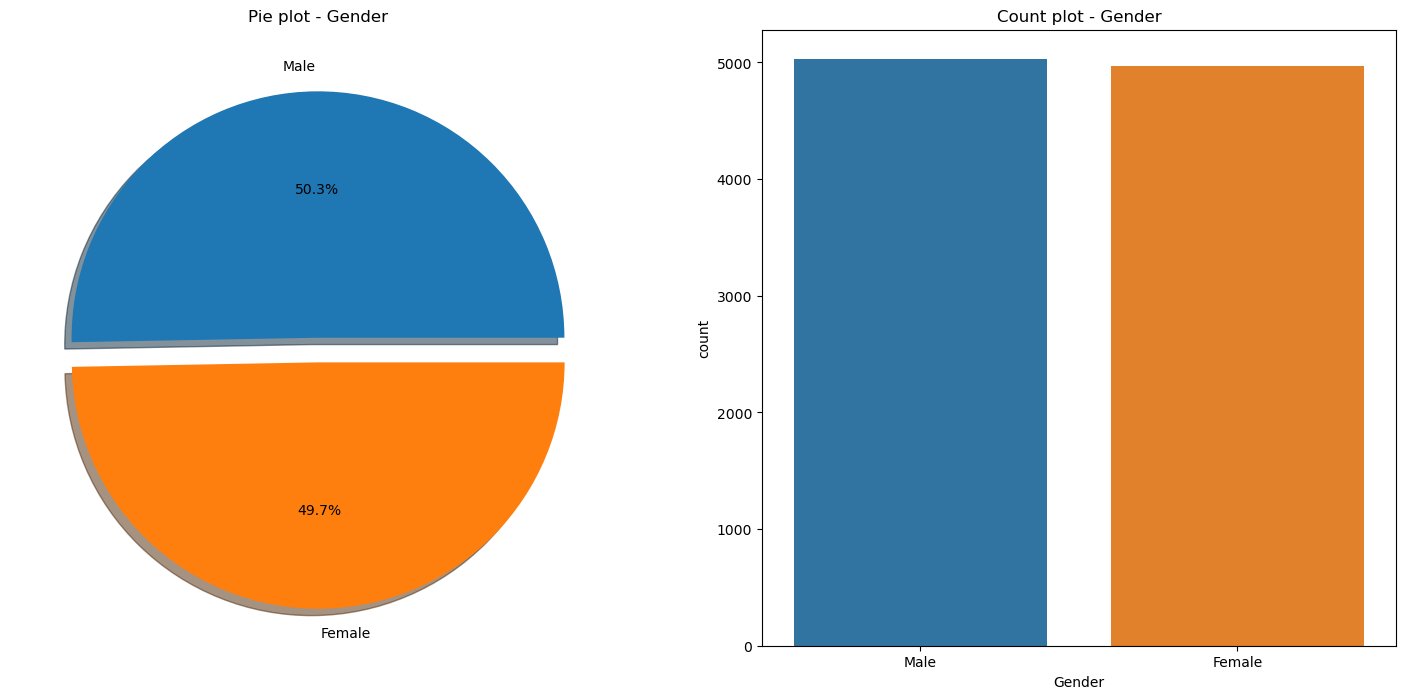

In [90]:
# 성별의 비율 확인
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Gender'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Gender')
ax[0].set_ylabel('')

sns.countplot(x='Gender', data=df, ax=ax[1])
ax[1].set_title('Count plot - Gender')

In [106]:
df[df['Diagnosis']=='Glaucoma'].groupby('Gender').count()

,Patient ID,Age,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
Gender,,,,,,,,,,,,,,,,
Female,2466,2466,2466,2466,2466,2466,1833,2165,2466,2466,2466,2466,2466,2466,2466,2466
Male,2546,2546,2546,2546,2546,2546,1885,2217,2546,2546,2546,2546,2546,2546,2546,2546


In [108]:
# 확진자별 남여 성비 
pd.crosstab(df['Diagnosis'], df['Gender'], margins=True)

Gender,Female,Male,All
Diagnosis,,,
Glaucoma,2466,2546,5012
No Glaucoma,2505,2483,4988
All,4971,5029,10000
